In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# डेटासेट तयार करण्यासाठी एक स्क्रिप्ट
def create_sales_dataset(num_records=1000):
    np.random.seed(42)
    
    # संभाव्य मूल्ये
    cities = ['Mumbai', 'Pune', 'Delhi', 'Bengaluru', 'Chennai', 'Ahmedabad', np.nan]
    categories = ['Electronics', 'Clothing', 'Home Goods', 'Books']
    products = {
        'Electronics': ['Laptop', 'Smartphone', 'Headphones', 'Smartwatch'],
        'Clothing': ['T-Shirt', 'Jeans', 'Saree', 'Kurta'],
        'Home Goods': ['Bedsheet', 'Cookware Set', 'Lamp', 'Cushions'],
        'Books': ['Fiction Novel', 'Biography', 'Science Book', 'History Book']
    }
    prices = {
        'Laptop': 75000, 'Smartphone': 25000, 'Headphones': 2000, 'Smartwatch': 4500,
        'T-Shirt': 500, 'Jeans': 1500, 'Saree': 2500, 'Kurta': 800,
        'Bedsheet': 1200, 'Cookware Set': 3000, 'Lamp': 900, 'Cushions': 400,
        'Fiction Novel': 350, 'Biography': 450, 'Science Book': 550, 'History Book': 600
    }

    data = []
    start_date = datetime(2024, 1, 1)
    for i in range(num_records):
        order_date = start_date + timedelta(days=np.random.randint(0, 365), hours=np.random.randint(0, 24))
        customer_id = f"CUS{np.random.randint(100, 500)}"
        city = np.random.choice(cities, p=[0.25, 0.25, 0.15, 0.15, 0.10, 0.05, 0.05])
        category = np.random.choice(categories)
        product = np.random.choice(products[category])
        quantity = np.random.randint(1, 4)
        
        # काही डुप्लिकेट आणि चुकीचे डेटा प्रकार तयार करणे
        price_str = f"Rs. {prices[product]:,}"
        if i % 100 == 0:
             price_str = f"Rs. {prices[product]:,}" # पुन्हा टाकून डुप्लिकेटची शक्यता
        
        data.append([i+1001, order_date.strftime('%Y-%m-%d %H:%M:%S'), customer_id, city, category, product, quantity, price_str])
        
    # डुप्लिकेट नोंदी घालणे
    data.append([1001, '2024-01-15 10:30:00', 'CUS123', 'Mumbai', 'Electronics', 'Laptop', 1, 'Rs. 75,000'])
    
    df = pd.DataFrame(data, columns=['OrderID', 'OrderDate', 'CustomerID', 'City', 'ProductCategory', 'ProductName', 'Quantity', 'PricePerUnit'])
    return df

# डेटासेट तयार करून CSV फाइलमध्ये सेव्ह करणे
sales_df_raw = create_sales_dataset(num_records=5000)
sales_df_raw.to_csv('dmart.csv', index=False)

print("Dataset 'dmart.csv' has been created successfully.")

Dataset 'dmart.csv' has been created successfully.


In [3]:
# CSV फाइल लोड करणे
df = pd.read_csv('dmart.csv')

# डेटाच्या पहिल्या काही ओळी पाहणे
print("First 5 rows of the dataset:\n")
print(df.head())

# डेटाची मूलभूत माहिती मिळवणे
print("\nBasic information about the dataset:\n")
df.info()

# संख्यात्मक स्तंभांचे वर्णन पाहणे
print("\nDescriptive statistics of the dataset:\n")
print(df.describe())

First 5 rows of the dataset:

   OrderID            OrderDate CustomerID       City ProductCategory  \
0     1001  2024-04-12 19:00:00     CUS448     Mumbai           Books   
1     1002  2024-04-12 18:00:00     CUS314     Mumbai           Books   
2     1003  2024-05-29 20:00:00     CUS357  Bengaluru        Clothing   
3     1004  2024-07-10 20:00:00     CUS260       Pune        Clothing   
4     1005  2024-02-18 09:00:00     CUS287       Pune        Clothing   

     ProductName  Quantity PricePerUnit  
0  Fiction Novel         1      Rs. 350  
1  Fiction Novel         3      Rs. 350  
2          Jeans         2    Rs. 1,500  
3        T-Shirt         1      Rs. 500  
4          Jeans         3    Rs. 1,500  

Basic information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          5001 non-null   int64 

In [4]:
# PricePerUnit स्तंभाला स्वच्छ करणे आणि संख्यात्मक रूपात बदलणे
df_clean = df.copy() # नेहमी मूळ डेटाफ्रेमची एक प्रत तयार करून तिच्यावर काम करावे
df_clean['PricePerUnit'] = df_clean['PricePerUnit'].str.replace('Rs. ', '').str.replace(',', '').astype(float)

# OrderDate स्तंभाला datetime रूपात बदलणे
df_clean['OrderDate'] = pd.to_datetime(df_clean['OrderDate'])

# आता पुन्हा .info() वापरून तपासणी करूया
print("Data types after correction:\n")
df_clean.info()

Data types after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          5001 non-null   int64         
 1   OrderDate        5001 non-null   datetime64[ns]
 2   CustomerID       5001 non-null   object        
 3   City             4736 non-null   object        
 4   ProductCategory  5001 non-null   object        
 5   ProductName      5001 non-null   object        
 6   Quantity         5001 non-null   int64         
 7   PricePerUnit     5001 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 312.7+ KB


In [5]:
# TotalSale स्तंभ तयार करणे
df_clean['TotalSale'] = df_clean['Quantity'] * df_clean['PricePerUnit']

# वेळेवर आधारित फीचर्स तयार करणे
df_clean['Month'] = df_clean['OrderDate'].dt.month
df_clean['DayOfWeek'] = df_clean['OrderDate'].dt.dayofweek # Monday=0, Sunday=6
df_clean['Hour'] = df_clean['OrderDate'].dt.hour

print("\nDataframe with newly created features:\n")
print(df_clean[['OrderDate', 'TotalSale', 'Month', 'DayOfWeek', 'Hour']].head())


Dataframe with newly created features:

            OrderDate  TotalSale  Month  DayOfWeek  Hour
0 2024-04-12 19:00:00      350.0      4          4    19
1 2024-04-12 18:00:00     1050.0      4          4    18
2 2024-05-29 20:00:00     3000.0      5          2    20
3 2024-07-10 20:00:00      500.0      7          2    20
4 2024-02-18 09:00:00     4500.0      2          6     9


In [6]:
# City स्तंभातील गहाळ जागा भरणे
most_frequent_city = df_clean['City'].mode()[0]
df_clean['City'].fillna(most_frequent_city, inplace=True)

print(f"\nMissing values in 'City' were filled with '{most_frequent_city}'.")
print("Are there any missing values left?", df_clean.isnull().sum().any())


Missing values in 'City' were filled with 'Mumbai'.
Are there any missing values left? False


In [7]:
# डुप्लिकेट नोंदी शोधणे
num_duplicates = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows found: {num_duplicates}")

# डुप्लिकेट नोंदी काढून टाकणे
df_clean.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df_clean)}")


Number of duplicate rows found: 0
Number of rows after dropping duplicates: 5001



Total Sales by Product Category:

ProductCategory
Electronics    64105000.0
Clothing        3381400.0
Home Goods      3303100.0
Books           1220950.0
Name: TotalSale, dtype: float64


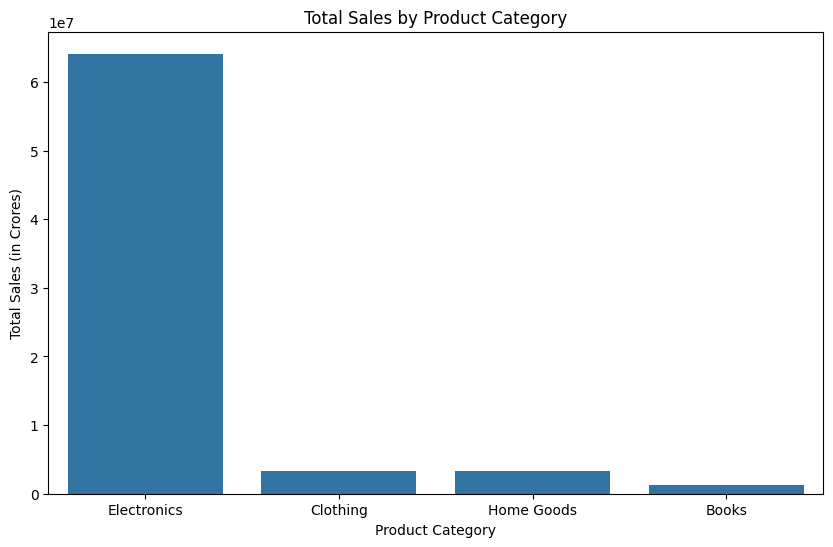

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

category_sales = df_clean.groupby('ProductCategory')['TotalSale'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:\n")
print(category_sales)

# व्हिज्युअलायझेशन
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (in Crores)")
plt.show()


Top 5 Products by Revenue:
 ProductName
Laptop          45525000.0
Smartphone      14575000.0
Smartwatch       2673000.0
Saree            1695000.0
Cookware Set     1692000.0
Name: TotalSale, dtype: float64

Top 5 Products by Quantity Sold:
 ProductName
Biography     705
Saree         678
Bedsheet      671
Headphones    666
T-Shirt       648
Name: Quantity, dtype: int64


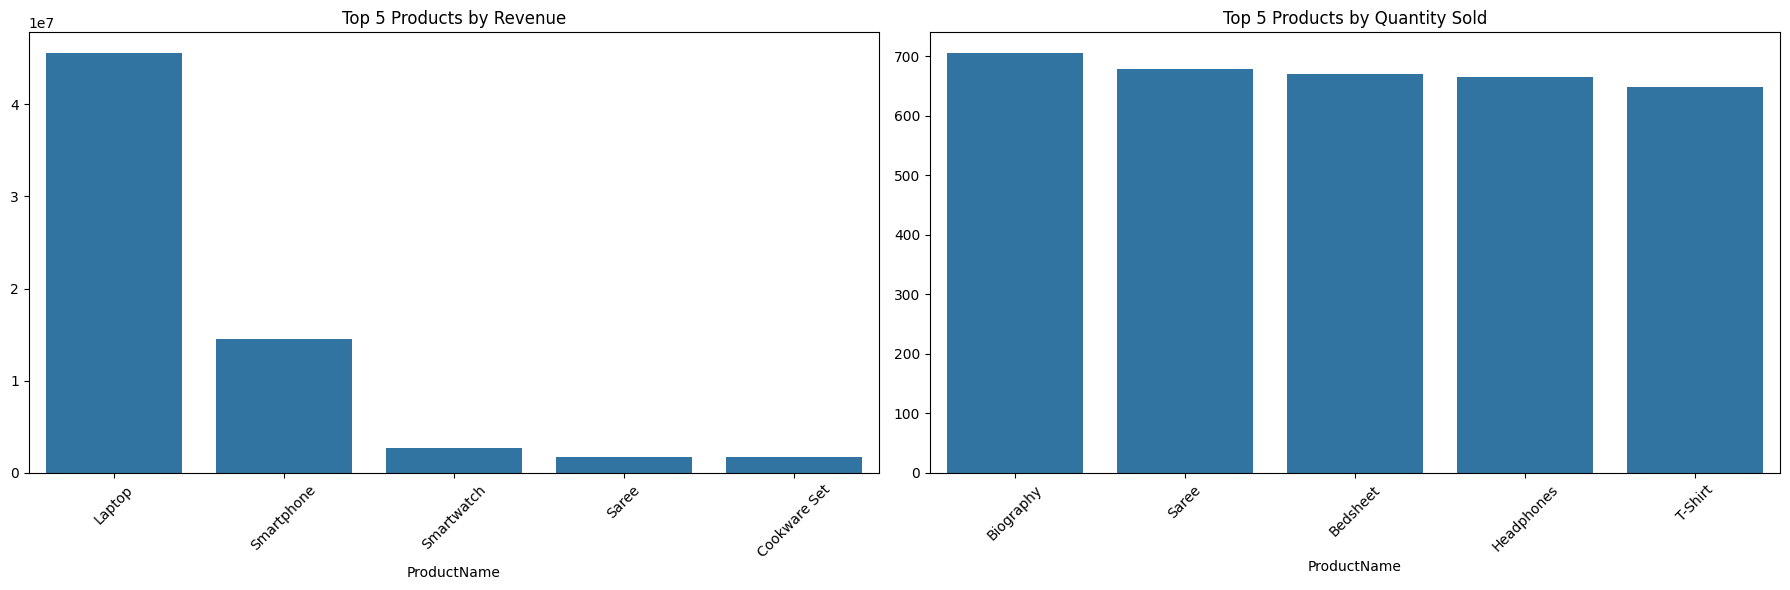

In [11]:
# उत्पादन नावानुसार एकूण विक्री
product_sales_revenue = df_clean.groupby('ProductName')['TotalSale'].sum().sort_values(ascending=False)
# उत्पादन नावानुसार एकूण संख्या
product_sales_quantity = df_clean.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

# टॉप ५ उत्पादने
print("\nTop 5 Products by Revenue:\n", product_sales_revenue.head(5))
print("\nTop 5 Products by Quantity Sold:\n", product_sales_quantity.head(5))

# व्हिज्युअलायझेशन
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=product_sales_revenue.head(5).index, y=product_sales_revenue.head(5).values, ax=axes[0])
axes[0].set_title("Top 5 Products by Revenue")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=product_sales_quantity.head(5).index, y=product_sales_quantity.head(5).values, ax=axes[1])
axes[1].set_title("Top 5 Products by Quantity Sold")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

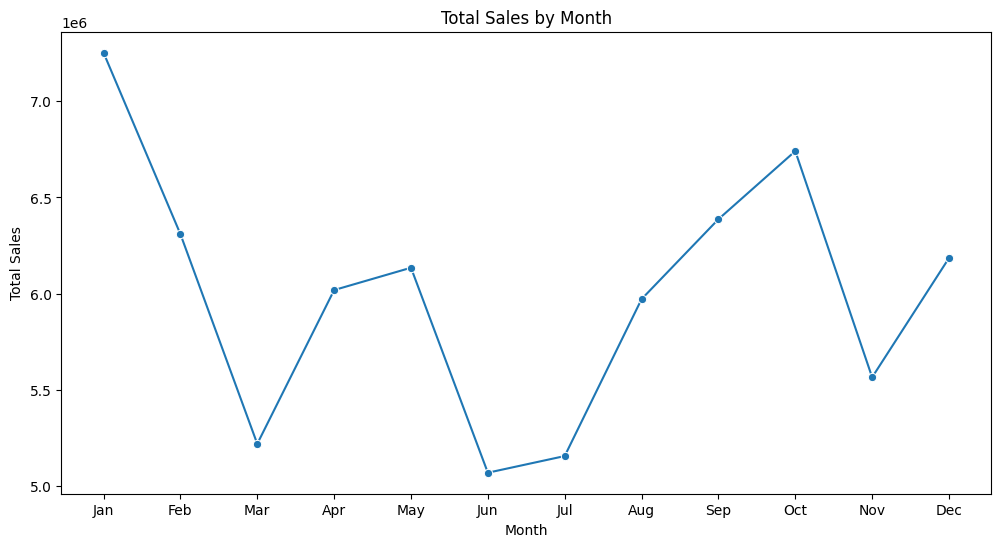

In [12]:
# महिन्यानुसार एकूण विक्री काढणे
# आपण प्रकरण ६ मध्ये तयार केलेला 'Month' स्तंभ वापरूया
monthly_sales = df_clean.groupby('Month')['TotalSale'].sum()

# महिन्यानुसार क्रमवारी लावणे (sorting) इंजिनिअरिंग आलेख योग्य दिसेल
monthly_sales = monthly_sales.sort_index()

# व्हिज्युअलायझेशनसाठी एक डेटाफ्रेम तयार करणे
monthly_sales_df = pd.DataFrame({'Month': monthly_sales.index, 'TotalSales': monthly_sales.values})

# व्हिज्युअलायझेशन
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalSales', data=monthly_sales_df, marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

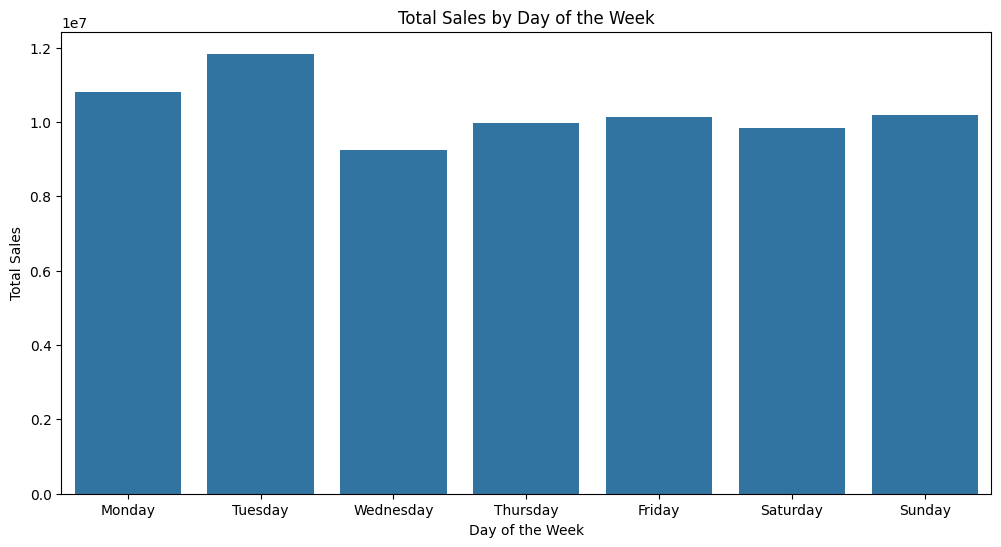

In [13]:
# आठवड्याच्या दिवसांनुसार एकूण विक्री
day_of_week_sales = df_clean.groupby('DayOfWeek')['TotalSale'].sum()

# दिवसांनुसार क्रमवारी लावणे (Monday=0, Sunday=6)
day_of_week_sales = day_of_week_sales.sort_index()

# दिवसांना योग्य नावे देणे
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(x=day_names, y=day_of_week_sales.values)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

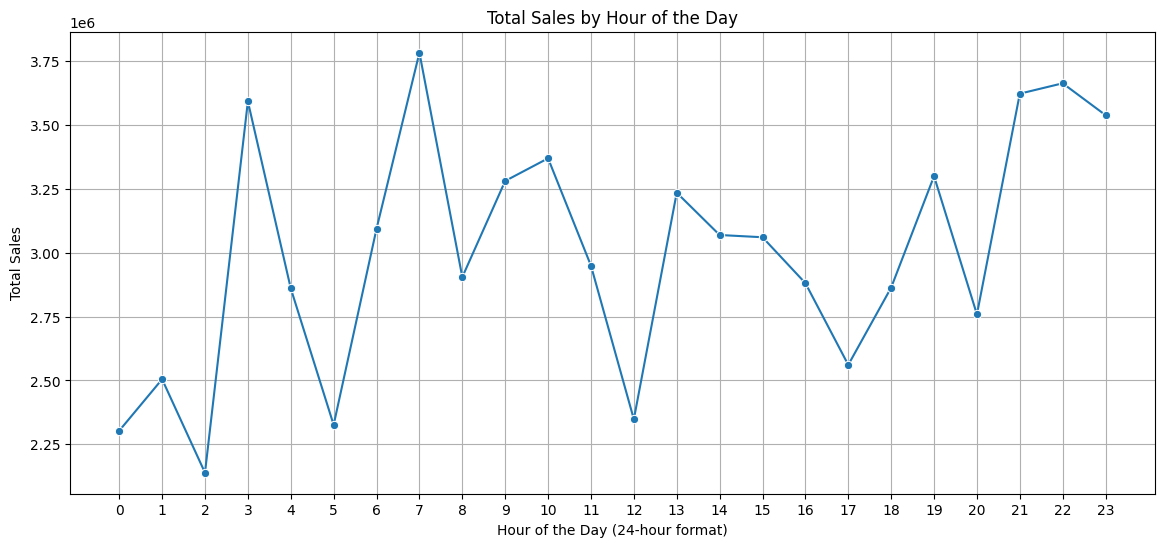

In [14]:
# तासानुसार एकूण विक्री
hourly_sales = df_clean.groupby('Hour')['TotalSale'].sum()
hourly_sales = hourly_sales.sort_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Top 10 Cities by Sales:

City
Mumbai       23251050.0
Pune         17792800.0
Bengaluru    10396050.0
Delhi        10177350.0
Chennai       6961100.0
Ahmedabad     3432100.0
Name: TotalSale, dtype: float64


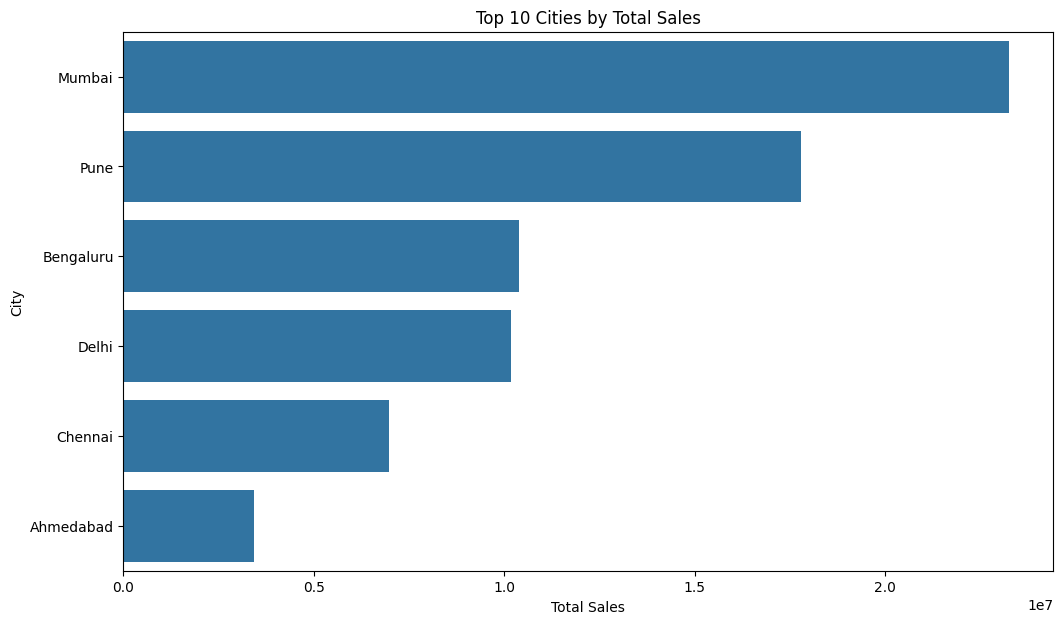

In [15]:
# शहरानुसार एकूण विक्री
city_sales = df_clean.groupby('City')['TotalSale'].sum().sort_values(ascending=False)

print("Top 10 Cities by Sales:\n")
print(city_sales.head(10))

# टॉप १० शहरांचे व्हिज्युअलायझेशन
plt.figure(figsize=(12, 7))
sns.barplot(x=city_sales.head(10).values, y=city_sales.head(10).index)
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

In [16]:
# प्रत्येक ग्राहकानुसार एकूण खरेदी
customer_sales = df_clean.groupby('CustomerID')['TotalSale'].sum().sort_values(ascending=False)

print("Top 10 Most Valuable Customers:\n")
print(customer_sales.head(10))

Top 10 Most Valuable Customers:

CustomerID
CUS271    794000.0
CUS131    765900.0
CUS382    691800.0
CUS385    681450.0
CUS268    630050.0
CUS482    615200.0
CUS212    600000.0
CUS396    590500.0
CUS157    571000.0
CUS377    560300.0
Name: TotalSale, dtype: float64
